In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### 1. Insurance datasetda one-hot encoding va label-encoding qilish

In [4]:
pd.get_dummies(df, columns=['sex'], dtype=int, drop_first=True)

,age,bmi,children,smoker,region,charges,sex_male
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,no,northwest,10600.54830,1
1334,18,31.920,0,no,northeast,2205.98080,0
1335,18,36.850,0,no,southeast,1629.83350,0
1336,21,25.800,0,no,southwest,2007.94500,0


#### Jinsiga qarab encode qildi. Bu usul one hot encoding. (Male = 1, Female = 0)

In [5]:
le = LabelEncoder()
le.fit(df["sex"])

LabelEncoder()

In [6]:
le.transform(df["sex"])

array([0, 1, 1, ..., 0, 0, 0])

In [7]:
df["labeled_gender"] = le.fit_transform(df["sex"])
df

,age,sex,bmi,children,smoker,region,charges,labeled_gender
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


#### Label encodingda ham male uchun 1 female uchun 0 labellar tanlandi va yani labeled_gender ustuniga yozildi.

Labellashni pandasning o'zida ham amalga oshirish mumkin

In [10]:
df["pandas"] = pd.factorize(df["sex"])[0]
df

,age,sex,bmi,children,smoker,region,charges,labeled_gender,pandas
0,19,female,27.900,0,yes,southwest,16884.92400,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1
4,32,male,28.880,0,no,northwest,3866.85520,1,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


### 2. Insurance datasetda outlier'larni 3 ta uslubda chiqarib tashlash va 3 ta uslubda upper_limit, lower_limit ga outlier'larni tenglashtirish

#### 1-usul treshold

<Axes: >

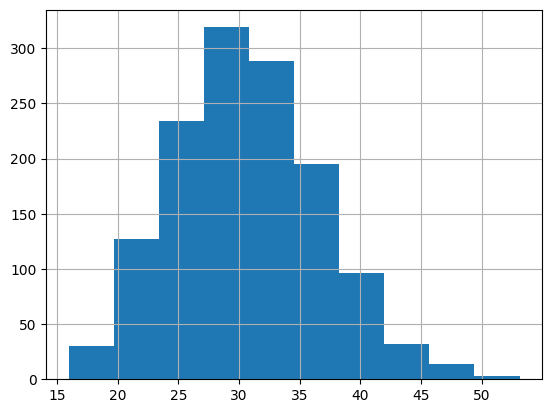

In [17]:
df['bmi'].hist()

In [14]:
mean = df['bmi'].mean()
std = df['bmi']. std()
treshold = 3

In [15]:
upper_limit = mean + treshold * std
lower_limit = mean - treshold * std

<Axes: >

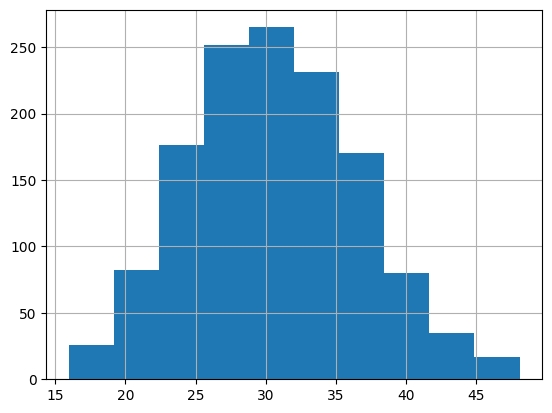

In [16]:
df_no_outliers = df[(df['bmi'] >= lower_limit) & (df['bmi'] <= upper_limit)]
df_no_outliers['bmi'].hist()

Outlierlari yo''qolib ketti

#### 2-usul

In [22]:
df['bmi'].mean()

np.float64(30.66339686098655)

In [23]:
df['bmi'].median()


np.float64(30.4)

#### Ko'rinib turiptiki bmi column normal distributionga tushadi. Biz ikkinchi usuldan foydalanishimiz uchun skewed distribution bo'lishi kerak. Ya'ni avg mediandan yo kattaroq yo kichikroq bo'lishi kerak edi. Shunda yo o'ngga yoki chapga og'gan bo'ladi.

In [29]:
Q1 = df['bmi'].quantile(.25)
Q3 = df['bmi'].quantile(.75)
IQR = Q3 - Q1


In [50]:
upper_limit2 = Q3 + IQR * 3
lower_limit2 = Q1 - IQR * 3


<Axes: >

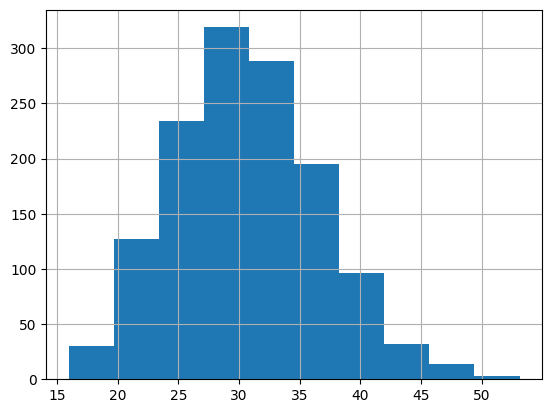

In [52]:
df_no_outliers2 = df[(df['bmi'] >= lower_limit2) & (df['bmi'] <= upper_limit2)]
df_no_outliers2['bmi'].hist()

#### Bizda BMI column normal ditribution bo'lgani uchun uni 2-usulda outlierlarini yo'qota olmadik

#### 3 - usul

In [35]:
q95 = df['bmi'].quantile(.95)
q05 = df['bmi'].quantile(.05)
q05

np.float64(21.256000000000004)

<Axes: >

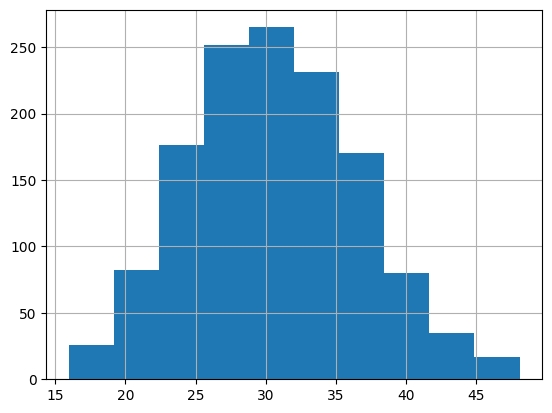

In [37]:
df_no_outliers3 = df[(df['bmi'] >= q05) & (df['bmi'] <= q95)]
df_no_outliers['bmi'].hist()


In [54]:
### 2-usul charges ustunida qaytadan ishlatib ko'rildi

In [42]:
df['charges'].mean()
df['charges'].median()



np.float64(9382.033)

In [43]:
Q1 = df['charges'].quantile(.25)
Q3 = df['charges'].quantile(.75)
IQR = Q3 - Q1

In [47]:
upper_limit2 = Q3 + IQR * 3
lower_limit2 = Q1 - IQR * 3


<Axes: >

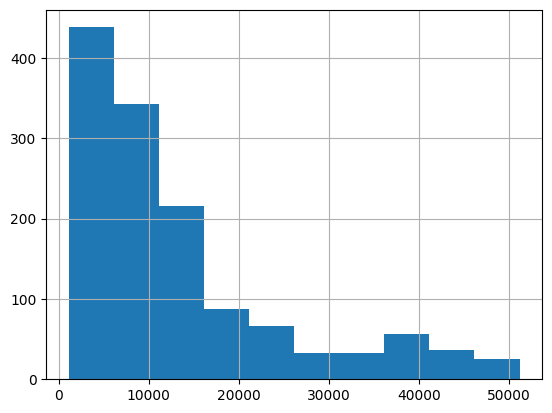

In [49]:
df_no_outliers2 = df[(df['charges'] >= lower_limit2) & (df['charges'] <= upper_limit2)]
df_no_outliers2['charges'].hist()

<Axes: >

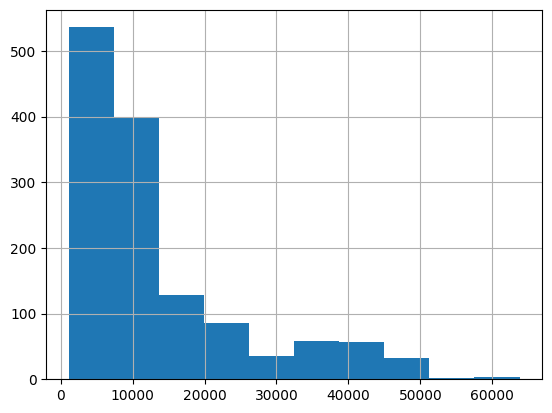

In [53]:
df['charges'].hist()